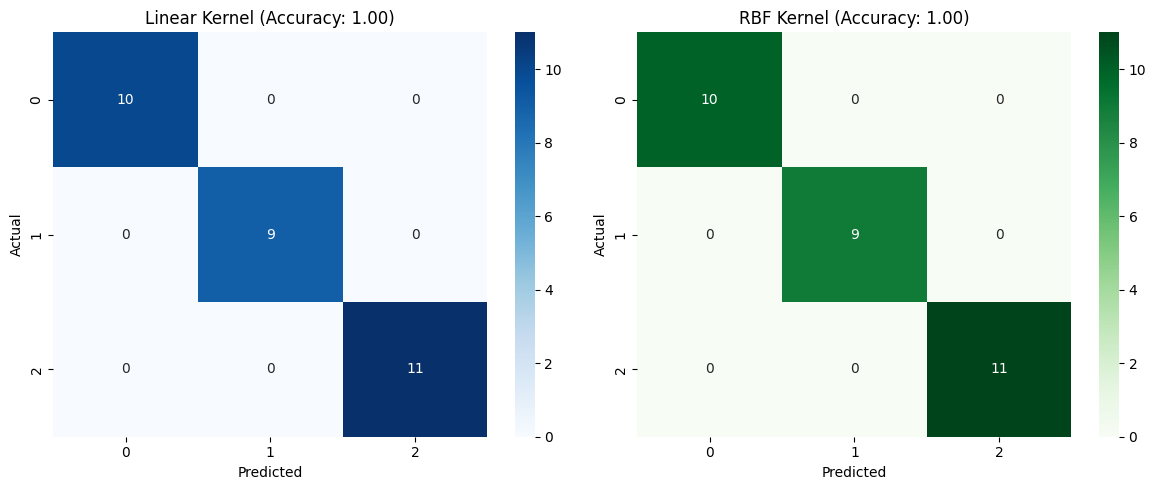

Linear Kernel Accuracy: 1.0000
RBF Kernel Accuracy: 1.0000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/iris (1).csv")


X = df.drop('species', axis=1)
y = LabelEncoder().fit_transform(df['species'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)


y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)


acc_linear = accuracy_score(y_test, y_pred_linear)
acc_rbf = accuracy_score(y_test, y_pred_rbf)


cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f"Linear Kernel (Accuracy: {acc_linear:.2f})")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title(f"RBF Kernel (Accuracy: {acc_rbf:.2f})")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

print(f"Linear Kernel Accuracy: {acc_linear:.4f}")
print(f"RBF Kernel Accuracy: {acc_rbf:.4f}")


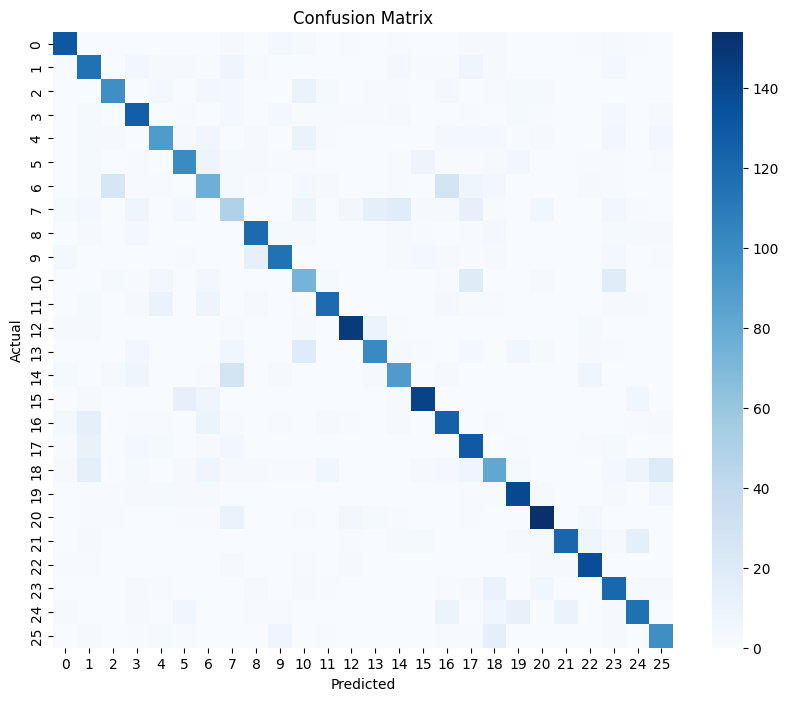

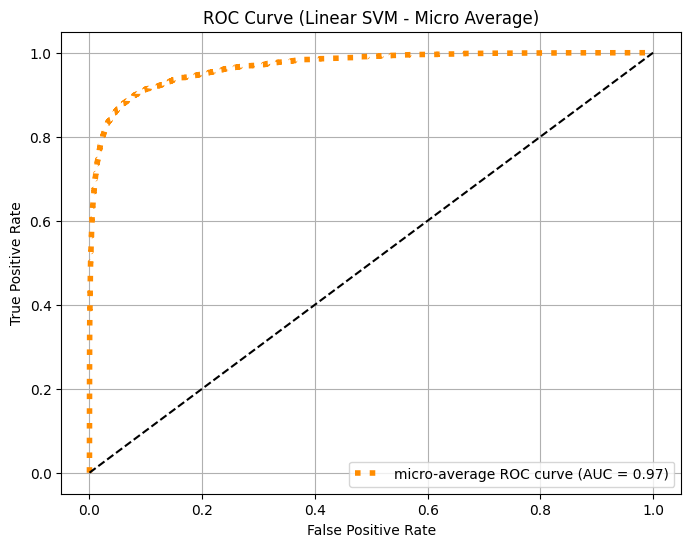

Accuracy: 0.7288


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/letter-recognition.csv")


X = df.drop("letter", axis=1)
y = df["letter"]
classes = sorted(y.unique())


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


y_bin = label_binarize(y, classes=classes)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


svc = LinearSVC(max_iter=10000)
calibrated_svc = CalibratedClassifierCV(svc, cv=3)
calibrated_svc.fit(X_train, y_train)


y_pred = calibrated_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


y_test_bin = label_binarize(y_test, classes=classes)
y_score = calibrated_svc.predict_proba(X_test)

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='darkorange', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Linear SVM - Micro Average)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Accuracy: {accuracy:.4f}")
